In [2]:
import torch 
import numpy as np
import os, sys
import matplotlib.pyplot as plt

sys.path.append('/home/sbose/time-series-forecasting-federation')
from files_for_appfl.comstock_dataloader import get_comstock_range

In [7]:
def print_attributes(obj):
    for name, value in vars(obj).items():
        print(f"{name}: {value}")
        
def plot_histograms(data1, data2, bins=10, title=""):
    min1, max1 = data1.min(), data1.max()
    min2, max2 = data2.min(), data2.max()
    max_val = max(data1.max(), data2.max())
    
    bin1 = np.linspace(min1, max1, bins+1)
    bin2 = np.linspace(min2, max2, bins+1)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(title)
    
    ax1.hist(data1, bins=bin1)
    ax1.set_title('Histogram 1')
    
    ax2.hist(data2, bins=bin2)
    ax2.set_title('Histogram 2')
    
    plt.show()
    
def conc(arrays):
    return np.concatenate(arrays, axis=0)

In [4]:
dsets, _, _ = get_comstock_range(12, normalize_type='z')

yn, xn, un, sn, yu, xu, uu, su = [[] for _ in range(8)]
for dset in dsets:
    y, x, u, s = dset._get_full_normalized_data()
    yn.append(y)
    xn.append(x)
    un.append(u)
    sn.append(s)
    y, x, u, s = dset._get_full_unnormalized_data()
    yu.append(y)
    xu.append(x)
    uu.append(u)
    su.append(s)
yn, xn, un, sn, yu, xu, uu, su = [conc(itm) for itm in [yn, xn, un, sn, yu, xu, uu, su]]

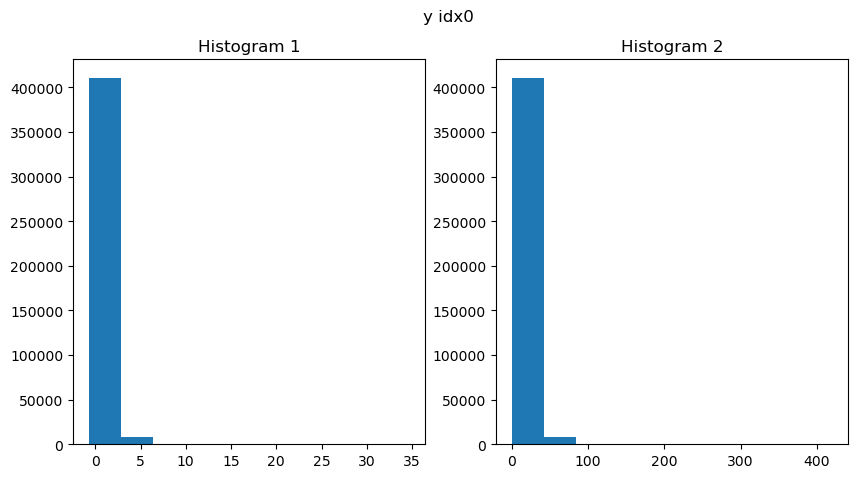

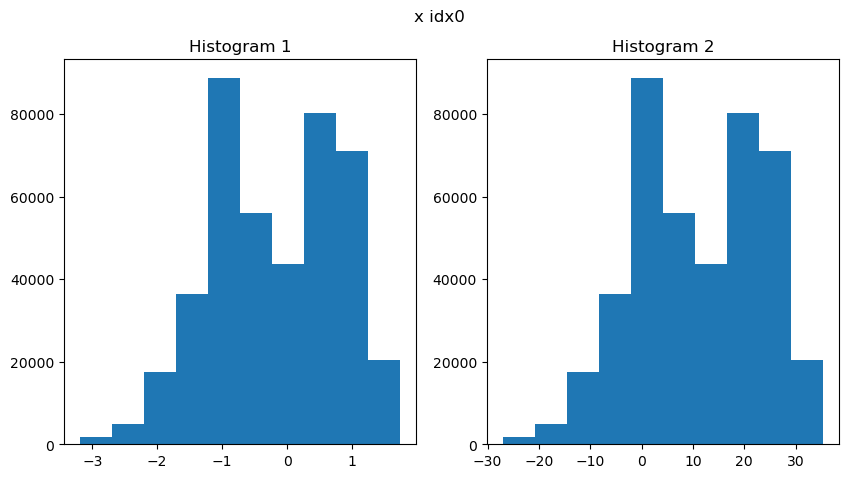

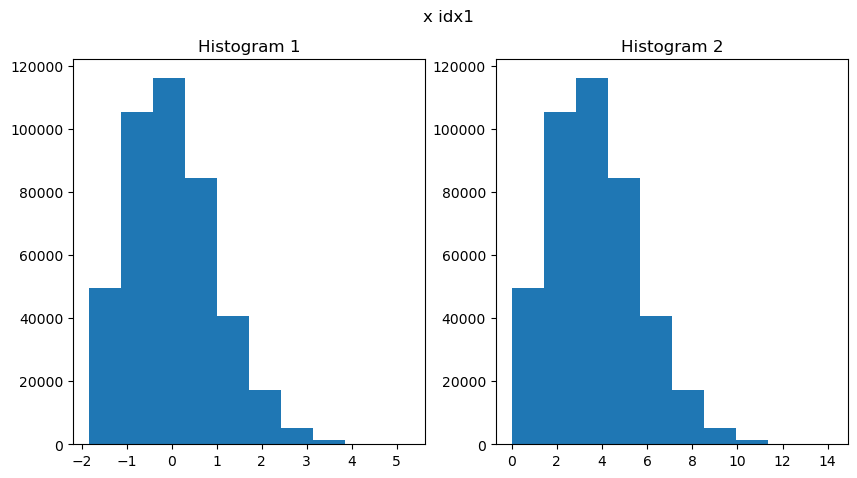

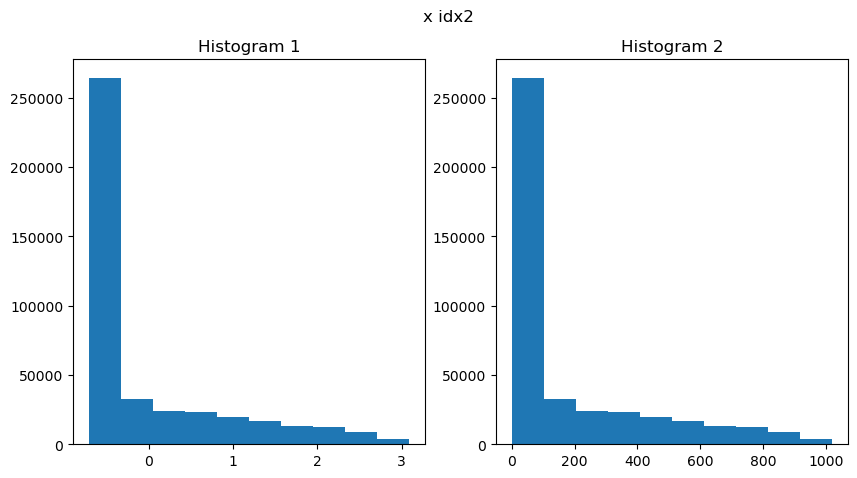

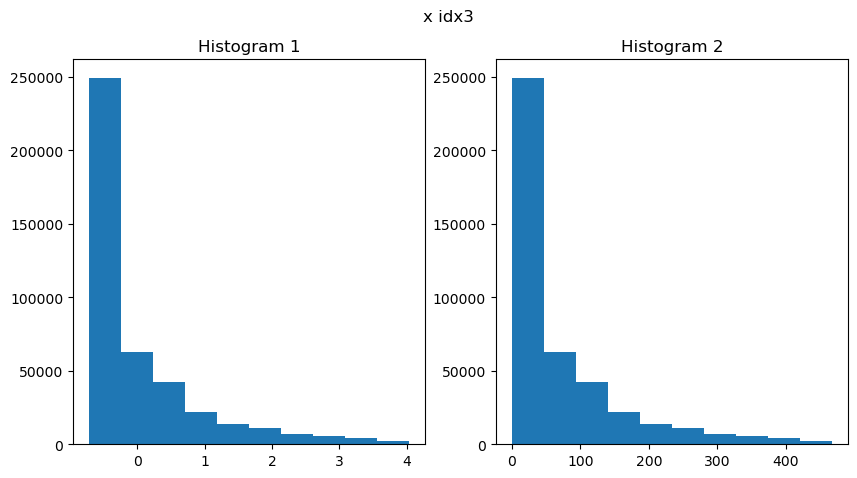

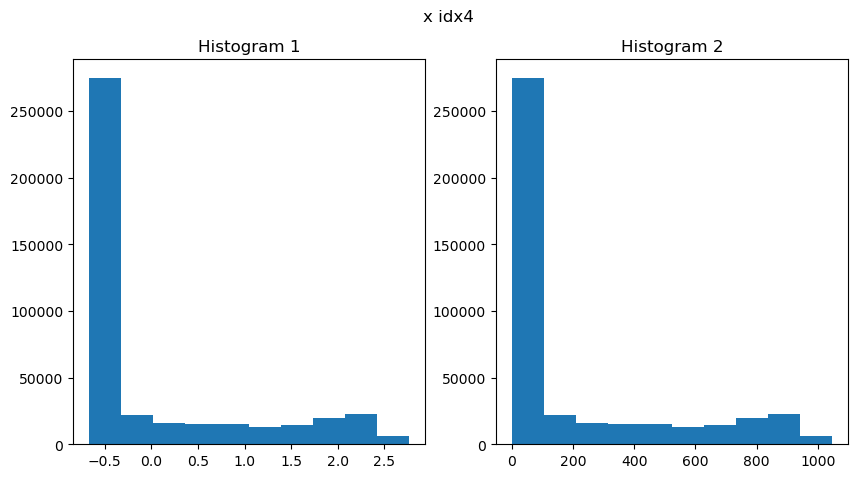

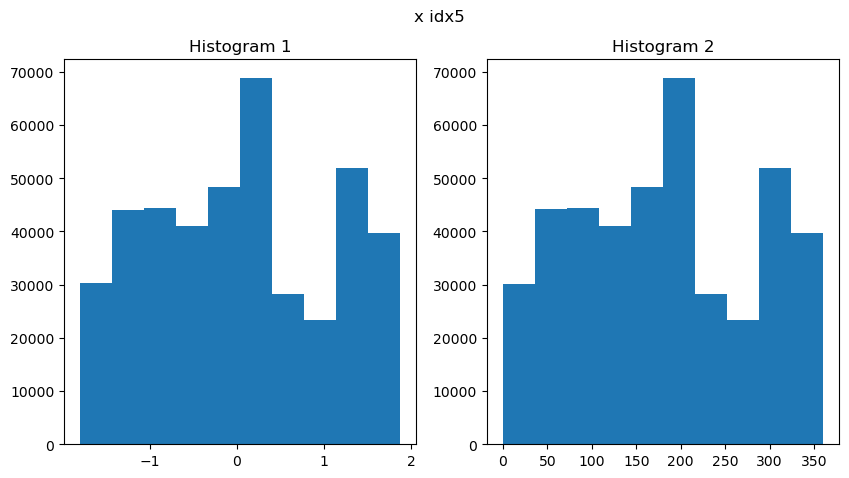

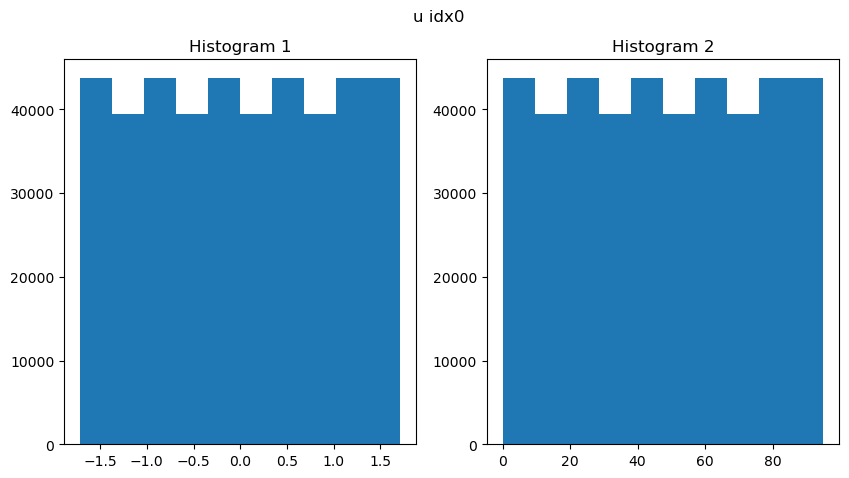

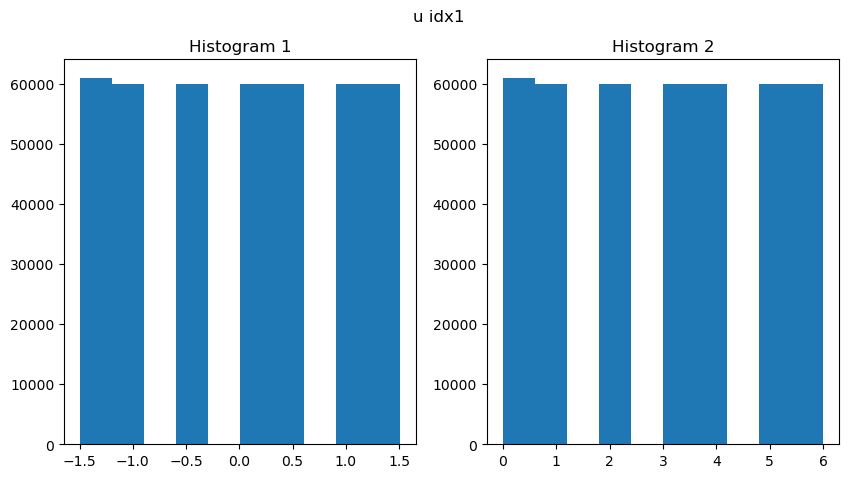

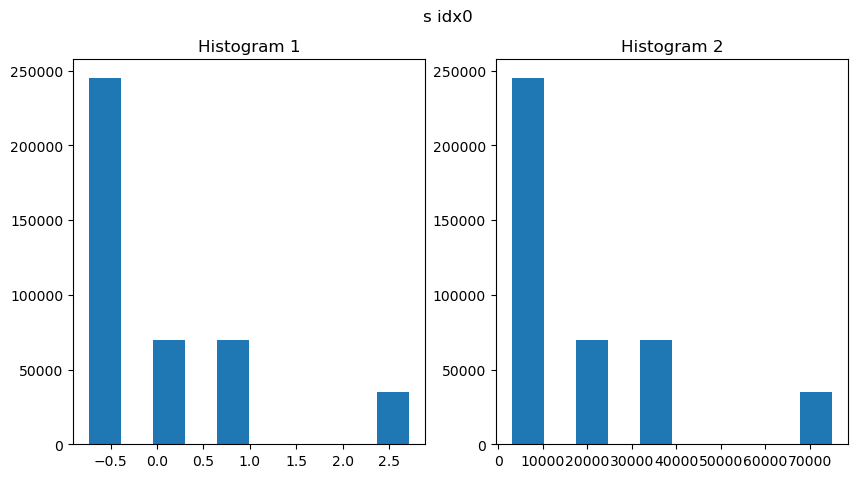

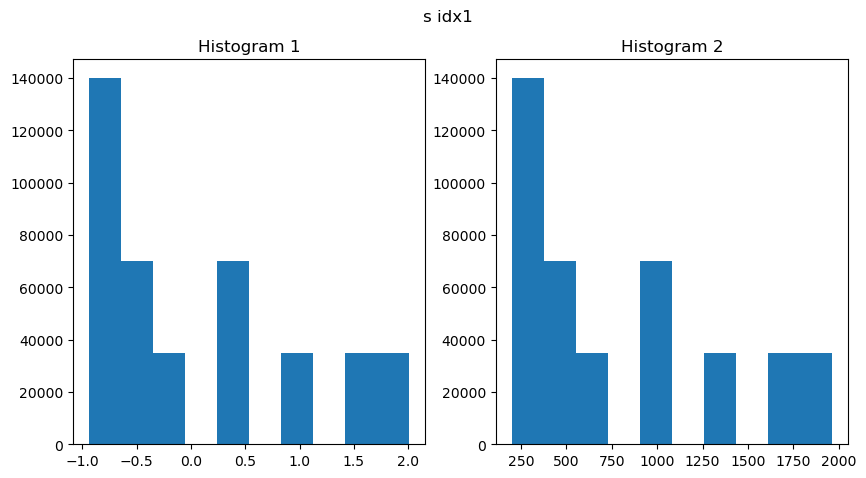

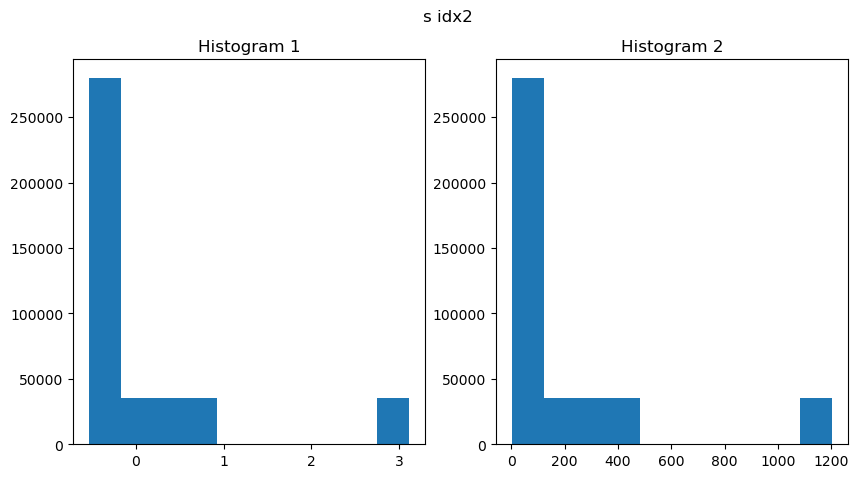

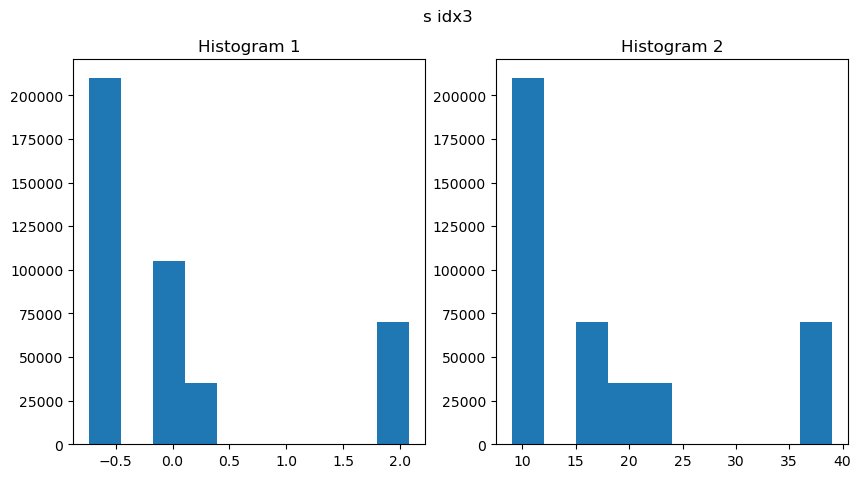

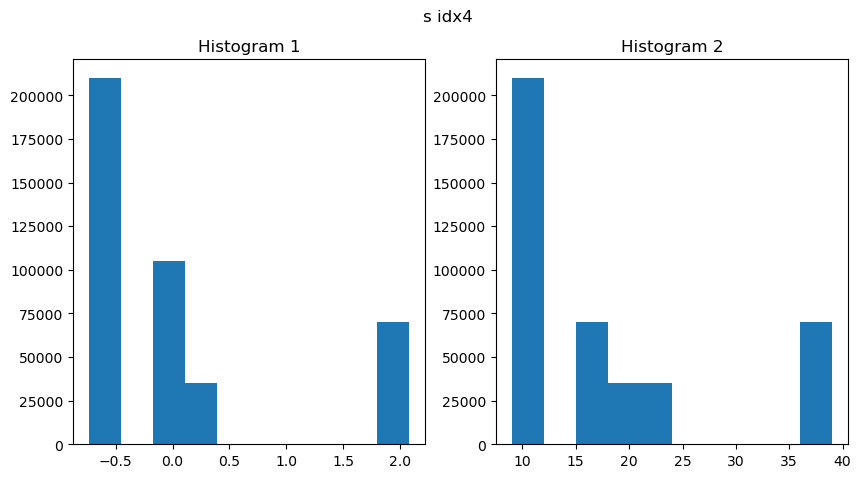

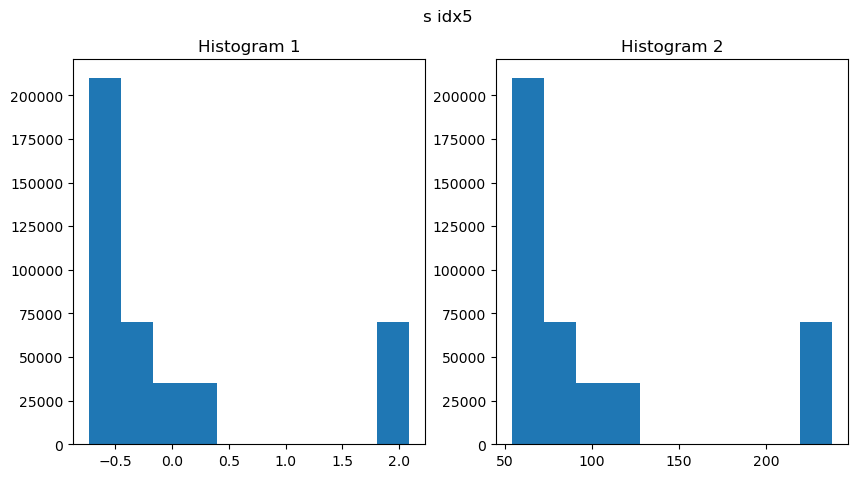

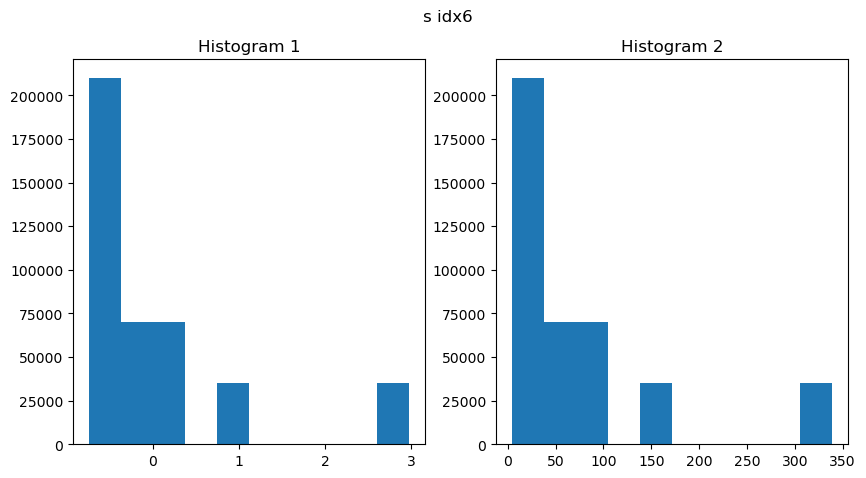

In [8]:
for id in range(yn.shape[1]):
    plot_histograms(yn[:,id], yu[:,id], bins=10, title=f"y idx{id}")
for id in range(xn.shape[1]):
    plot_histograms(xn[:,id], xu[:,id], bins=10, title=f"x idx{id}")
for id in range(un.shape[1]):
    plot_histograms(un[:,id], uu[:,id], bins=10, title=f"u idx{id}")
for id in range(sn.shape[1]):
    plot_histograms(sn[:,id], su[:,id], bins=10, title=f"s idx{id}")